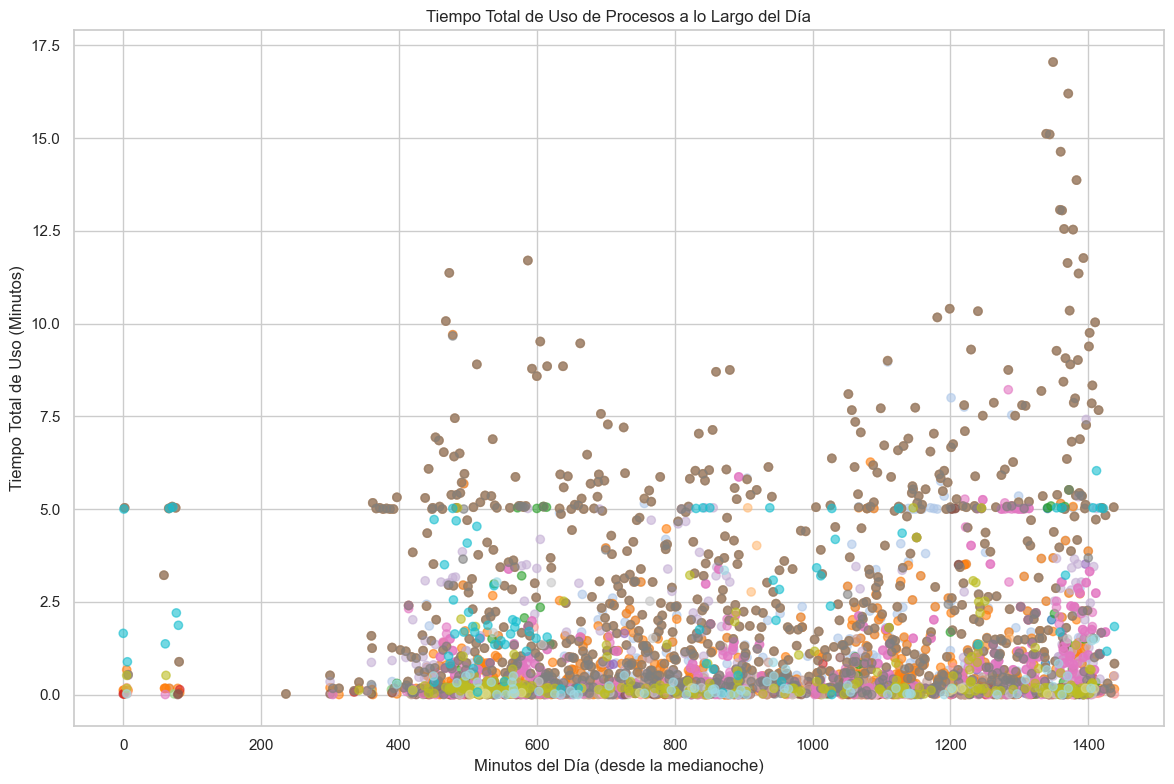

In [10]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargamos los datos
df_final = pd.read_csv('30_F_modificado.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos la hora del día en minutos desde la medianoche
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Agrupamos por 'ProcessName' y 'Minutos_Dia' para obtener el tiempo total de uso por minutos del día
uso_por_minutos_dia = df_final.groupby(['ProcessName', 'Minutos_Dia']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Codificamos 'ProcessName' para la visualización por color
encoder = LabelEncoder()
uso_por_minutos_dia['Color'] = encoder.fit_transform(uso_por_minutos_dia['ProcessName'])

# Creamos un mapa de colores con una entrada única por cada proceso
unique_colors = ListedColormap(plt.cm.tab20.colors[:len(encoder.classes_)])

# Creación del scatter plot
plt.figure(figsize=(14, 8))
sc = plt.scatter(uso_por_minutos_dia['Minutos_Dia'], uso_por_minutos_dia['Duracion_Minutos'], alpha=0.6, c=uso_por_minutos_dia['Color'], cmap=unique_colors)

# Creación de la leyenda del color para cada proceso
legend_labels = encoder.classes_
legend_colors = [sc.cmap(sc.norm(color)) for color in range(len(legend_labels))]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

# Añadir la leyenda fuera del plot a la derecha
#plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Procesos', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día (desde la medianoche)')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso de Procesos a lo Largo del Día')
plt.grid(True)

# Ajuste del layout para que la leyenda no recorte el gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar gráfico
plt.show()


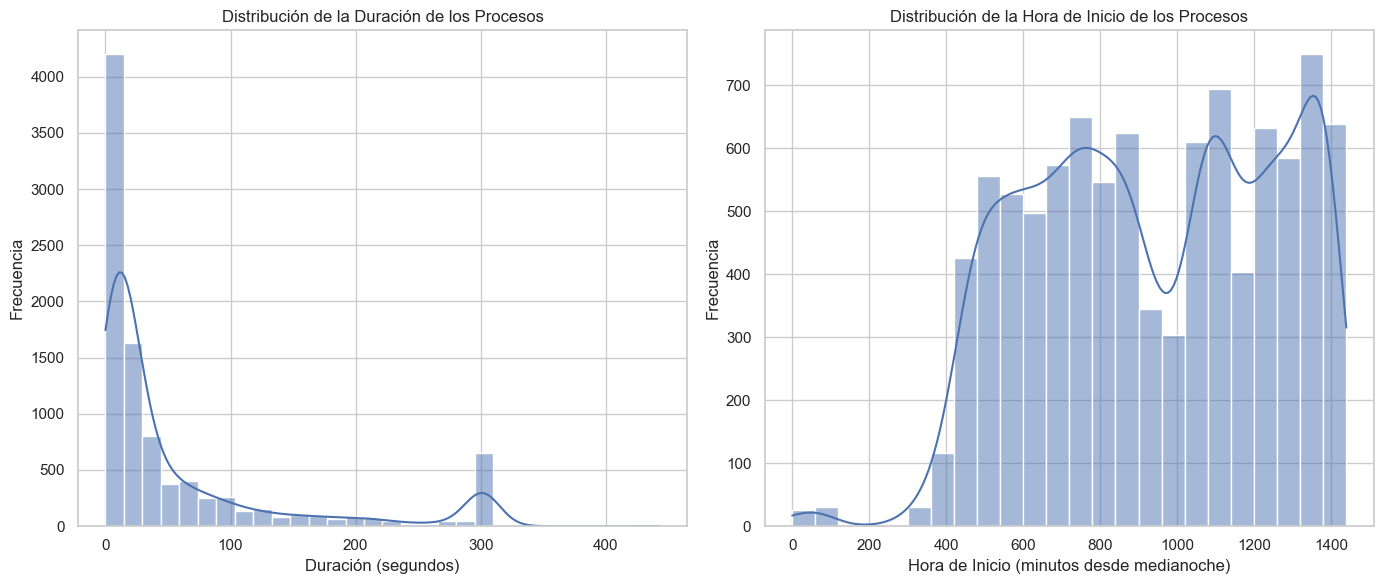

In [5]:
from datetime import datetime, timedelta

file_path = '30_F_modificado.csv'  # Asegúrate de ajustar la ruta del archivo según sea necesario
data = pd.read_csv(file_path)
# Definiendo una función para calcular la duración en segundos
def calcular_duracion(fecha_inicio, hora_inicio, fecha_final, hora_final):
    formato = "%Y-%m-%d %H:%M:%S"
    inicio = datetime.strptime(f"{fecha_inicio} {hora_inicio}", formato)
    final = datetime.strptime(f"{fecha_final} {hora_final}", formato)
    duracion = (final - inicio).total_seconds()
    return duracion

# Aplicando la función para calcular la duración de cada proceso
data['Duracion_Segundos'] = data.apply(lambda row: calcular_duracion(row['Fecha_Inicio'], row['Hora_Inicio'],
                                                                     row['Fecha_Final'], row['Hora_Final']), axis=1)

# Convirtiendo la hora de inicio a un formato numérico (minutos desde medianoche)
data['Hora_Inicio_Minutos'] = data['Hora_Inicio'].apply(lambda x: (datetime.strptime(x, "%H:%M:%S") - 
                                                                   datetime.strptime("00:00:00", "%H:%M:%S")).seconds / 60)

# Ahora tenemos dos nuevas columnas: 'Duracion_Segundos' y 'Hora_Inicio_Minutos'
# Estas serán nuestras dimensiones para aplicar clustering. Vamos a visualizar estas dimensiones para comprender mejor los datos.

import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set(style="whitegrid")

# Creando una figura con dos subplots (gráficos)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la distribución de la duración de los procesos
sns.histplot(data=data, x='Duracion_Segundos', bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de la Duración de los Procesos')
ax[0].set_xlabel('Duración (segundos)')
ax[0].set_ylabel('Frecuencia')

# Gráfico de la distribución de la hora de inicio de los procesos
sns.histplot(data=data, x='Hora_Inicio_Minutos', bins=24, kde=True, ax=ax[1])
ax[1].set_title('Distribución de la Hora de Inicio de los Procesos')
ax[1].set_xlabel('Hora de Inicio (minutos desde medianoche)')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
contar aplicaciones tiene abiertas en intervalos de 15 minutos

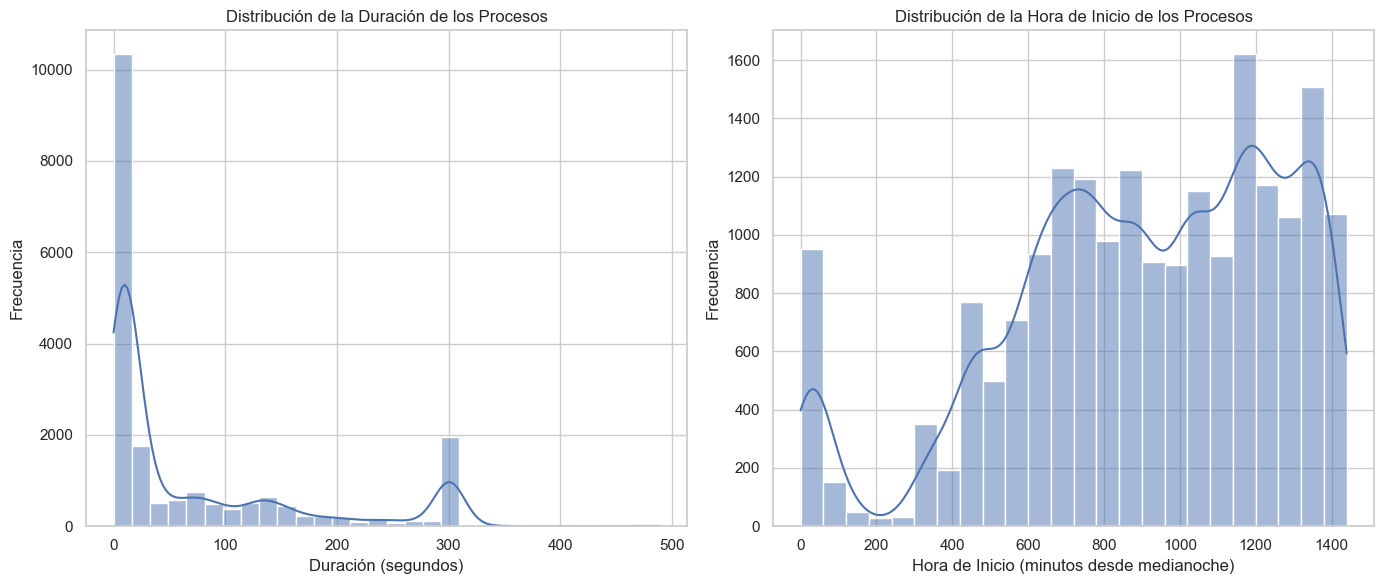

In [6]:
from datetime import datetime, timedelta
import pandas as pd
file_path = '27_F_modificado.csv'  # Asegúrate de ajustar la ruta del archivo según sea necesario
data = pd.read_csv(file_path)
# Definiendo una función para calcular la duración en segundos
def calcular_duracion(fecha_inicio, hora_inicio, fecha_final, hora_final):
    formato = "%Y-%m-%d %H:%M:%S"
    inicio = datetime.strptime(f"{fecha_inicio} {hora_inicio}", formato)
    final = datetime.strptime(f"{fecha_final} {hora_final}", formato)
    duracion = (final - inicio).total_seconds()
    return duracion

# Aplicando la función para calcular la duración de cada proceso
data['Duracion_Segundos'] = data.apply(lambda row: calcular_duracion(row['Fecha_Inicio'], row['Hora_Inicio'],
                                                                     row['Fecha_Final'], row['Hora_Final']), axis=1)

# Convirtiendo la hora de inicio a un formato numérico (minutos desde medianoche)
data['Hora_Inicio_Minutos'] = data['Hora_Inicio'].apply(lambda x: (datetime.strptime(x, "%H:%M:%S") - 
                                                                   datetime.strptime("00:00:00", "%H:%M:%S")).seconds / 60)

# Ahora tenemos dos nuevas columnas: 'Duracion_Segundos' y 'Hora_Inicio_Minutos'
# Estas serán nuestras dimensiones para aplicar clustering. Vamos a visualizar estas dimensiones para comprender mejor los datos.

import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set(style="whitegrid")

# Creando una figura con dos subplots (gráficos)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la distribución de la duración de los procesos
sns.histplot(data=data, x='Duracion_Segundos', bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de la Duración de los Procesos')
ax[0].set_xlabel('Duración (segundos)')
ax[0].set_ylabel('Frecuencia')

# Gráfico de la distribución de la hora de inicio de los procesos
sns.histplot(data=data, x='Hora_Inicio_Minutos', bins=24, kde=True, ax=ax[1])
ax[1].set_title('Distribución de la Hora de Inicio de los Procesos')
ax[1].set_xlabel('Hora de Inicio (minutos desde medianoche)')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


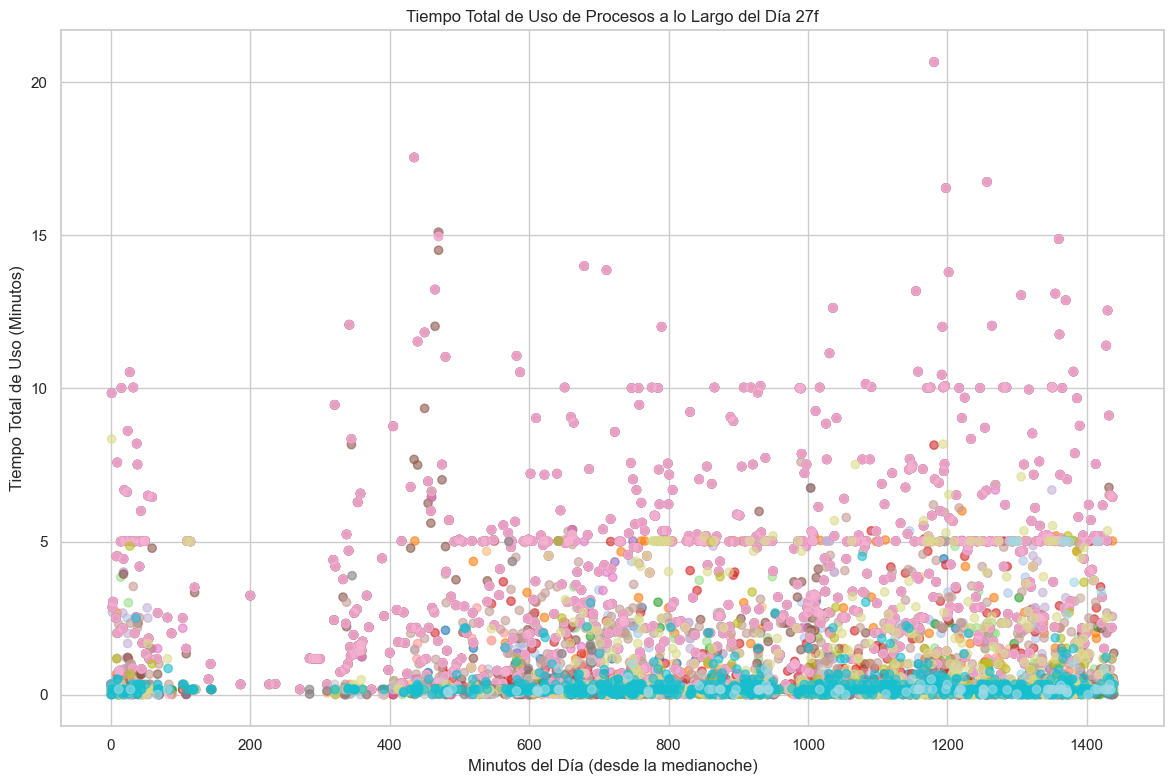

In [9]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargamos los datos
df_final = pd.read_csv('27_F_modificado.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos la hora del día en minutos desde la medianoche
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Agrupamos por 'ProcessName' y 'Minutos_Dia' para obtener el tiempo total de uso por minutos del día
uso_por_minutos_dia = df_final.groupby(['ProcessName', 'Minutos_Dia']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Codificamos 'ProcessName' para la visualización por color
encoder = LabelEncoder()
uso_por_minutos_dia['Color'] = encoder.fit_transform(uso_por_minutos_dia['ProcessName'])

# Creamos un mapa de colores con una entrada única por cada proceso
unique_colors = ListedColormap(plt.cm.tab20.colors[:len(encoder.classes_)])

# Creación del scatter plot
plt.figure(figsize=(14, 8))
sc = plt.scatter(uso_por_minutos_dia['Minutos_Dia'], uso_por_minutos_dia['Duracion_Minutos'], alpha=0.6, c=uso_por_minutos_dia['Color'], cmap=unique_colors)

# Creación de la leyenda del color para cada proceso
legend_labels = encoder.classes_
legend_colors = [sc.cmap(sc.norm(color)) for color in range(len(legend_labels))]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

# Añadir la leyenda fuera del plot a la derecha
#plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Procesos', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día (desde la medianoche)')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso de Procesos a lo Largo del Día 27f')
plt.grid(True)

# Ajuste del layout para que la leyenda no recorte el gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar gráfico
plt.show()


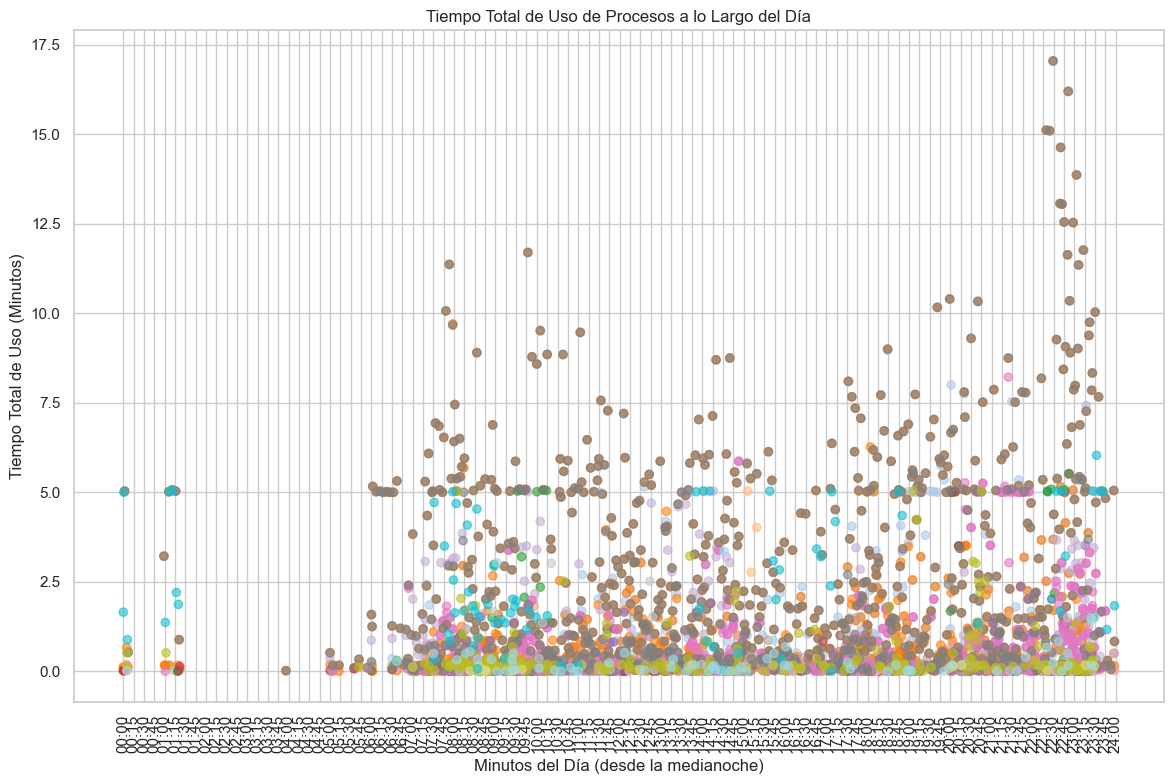

In [22]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Asumiendo que df_final ya está cargado y procesado como en tu código...
df_final = pd.read_csv('30_F_modificado.csv')
# Codificamos 'ProcessName' para la visualización por color
encoder = LabelEncoder()
uso_por_minutos_dia['Color'] = encoder.fit_transform(uso_por_minutos_dia['ProcessName'])

# Creamos un mapa de colores con una entrada única por cada proceso
unique_colors = ListedColormap(plt.cm.tab20.colors[:len(encoder.classes_)])

# Creación del scatter plot
plt.figure(figsize=(14, 8))
sc = plt.scatter(uso_por_minutos_dia['Minutos_Dia'], uso_por_minutos_dia['Duracion_Minutos'], alpha=0.6, c=uso_por_minutos_dia['Color'], cmap=unique_colors)

# Ajuste del eje X para mostrar intervalos de 15 minutos
xticks = range(0, 1441, 15)  # Genera marcas cada 15 minutos desde medianoche hasta 1440 minutos (24 horas)
plt.xticks(xticks, rotation=90)  # Rotamos las etiquetas para mejor legibilidad
# Para mejorar la visualización, puedes formatear las etiquetas para mostrarlas en formato de hora:minuto
xtick_labels = [f'{int(x/60):02d}:{x%60:02d}' for x in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)  # Actualiza las etiquetas con el formato de hora:minuto

# Creación de la leyenda del color para cada proceso
legend_labels = encoder.classes_
legend_colors = [sc.cmap(sc.norm(color)) for color in range(len(legend_labels))]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

# Añadir la leyenda fuera del plot a la derecha
#plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Procesos', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día (desde la medianoche)')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso de Procesos a lo Largo del Día')
plt.grid(True)

# Ajuste del layout para que la leyenda no recorte el gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar gráfico
plt.show()


C:\Users\Camilo\AppData\Local\Temp\ipykernel_13136\3844341781.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(uso_por_minutos_dia['ProcessName'].unique()))


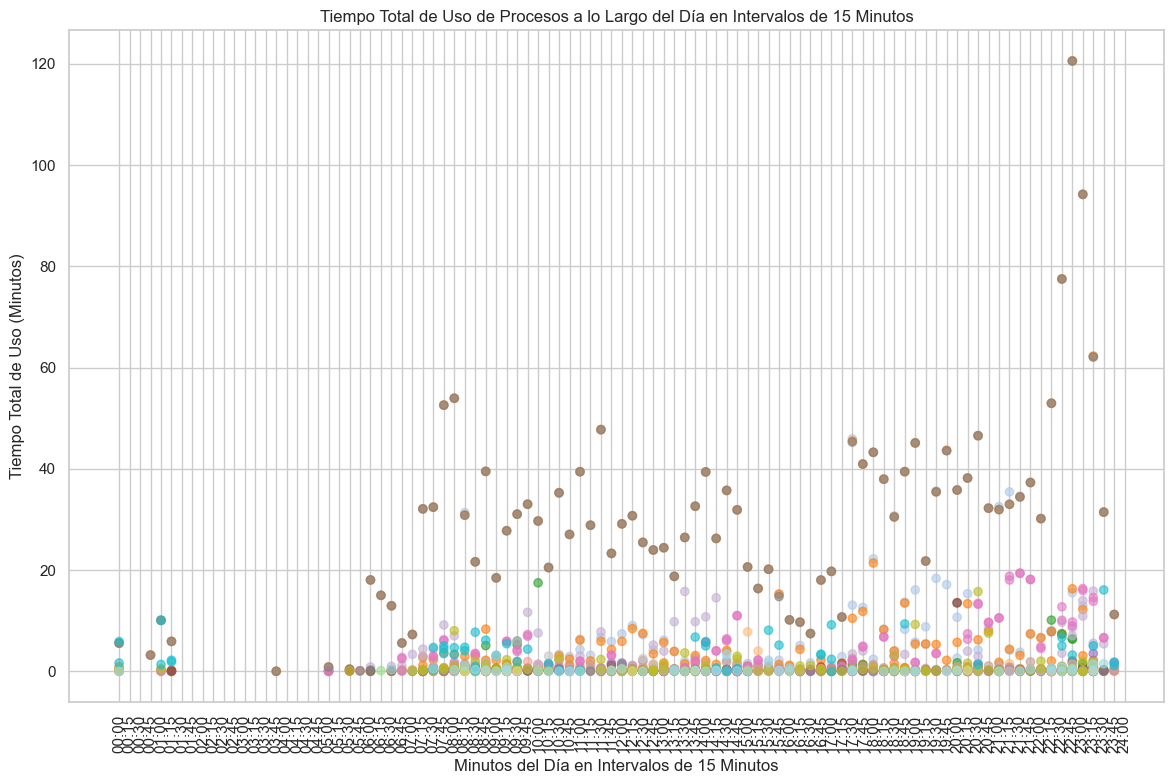

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargamos los datos
df_final = pd.read_csv('30_F_modificado.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos los minutos del día
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Redondeamos los minutos del día al intervalo de 15 minutos más cercano
df_final['Minutos_Dia_15'] = df_final['Minutos_Dia'] // 15 * 15

# Agrupamos por 'ProcessName' y 'Minutos_Dia_15' para obtener el tiempo total de uso por proceso en esos intervalos de tiempo
uso_por_minutos_dia = df_final.groupby(['ProcessName', 'Minutos_Dia_15']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Codificamos 'ProcessName' para la visualización por color
encoder = LabelEncoder()
uso_por_minutos_dia['Color'] = encoder.fit_transform(uso_por_minutos_dia['ProcessName'])

# Creamos un mapa de colores con una entrada única por cada proceso
unique_colors = plt.cm.get_cmap('tab20', len(uso_por_minutos_dia['ProcessName'].unique()))

# Creación del scatter plot
plt.figure(figsize=(14, 8))
sc = plt.scatter(uso_por_minutos_dia['Minutos_Dia_15'], uso_por_minutos_dia['Duracion_Minutos'], alpha=0.6, c=uso_por_minutos_dia['Color'], cmap=unique_colors)

# Ajustar las marcas del eje X para mostrar intervalos de 15 minutos en formato HH:MM
xticks = range(0, 1440 + 1, 15)
xtick_labels = [f'{int(x / 60):02d}:{int(x % 60):02d}' for x in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)

# Creación de la leyenda del color para cada proceso
#legend_labels = encoder.classes_
#legend_colors = [sc.cmap(sc.norm(color)) for color in uso_por_minutos_dia['Color'].unique()]
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

# Añadir la leyenda fuera del plot a la derecha
#plt.legend(handles=legend_handles, title='Procesos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día en Intervalos de 15 Minutos')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso de Procesos a lo Largo del Día en Intervalos de 15 Minutos')
plt.grid(True)

# Ajuste del layout para incluir la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar gráfico
plt.show()


C:\Users\Camilo\AppData\Local\Temp\ipykernel_11524\2622703086.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', len(uso_por_minutos_dia['ProcessName'].unique()))


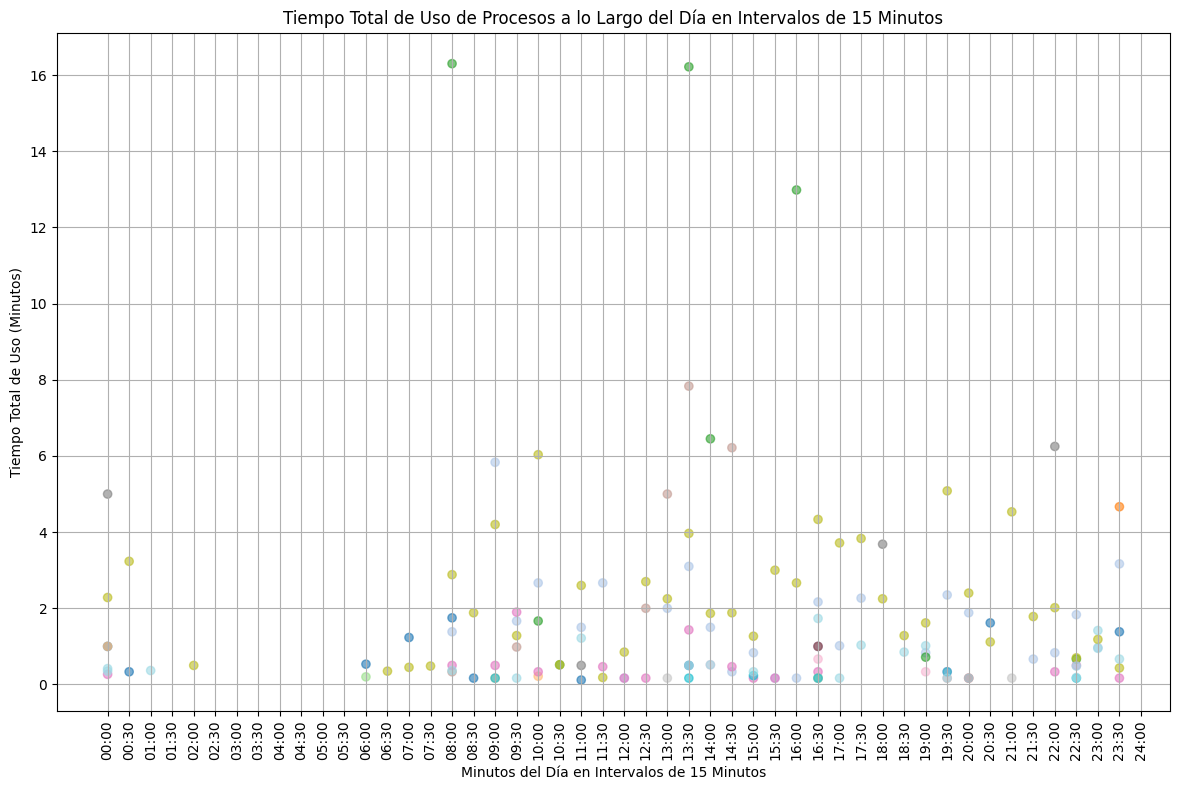

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargamos los datos
df_final = pd.read_csv('processed_Data_25.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos los minutos del día
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Redondeamos los minutos del día al intervalo de 15 minutos más cercano
df_final['Minutos_Dia_15'] = df_final['Minutos_Dia'] // 30 * 30

# Agrupamos por 'ProcessName' y 'Minutos_Dia_15' para obtener el tiempo total de uso por proceso en esos intervalos de tiempo
uso_por_minutos_dia = df_final.groupby(['ProcessName', 'Minutos_Dia_15']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Codificamos 'ProcessName' para la visualización por color
encoder = LabelEncoder()
uso_por_minutos_dia['Color'] = encoder.fit_transform(uso_por_minutos_dia['ProcessName'])

# Creamos un mapa de colores con una entrada única por cada proceso
unique_colors = plt.cm.get_cmap('tab20', len(uso_por_minutos_dia['ProcessName'].unique()))

# Creación del scatter plot
plt.figure(figsize=(14, 8))
sc = plt.scatter(uso_por_minutos_dia['Minutos_Dia_15'], uso_por_minutos_dia['Duracion_Minutos'], alpha=0.6, c=uso_por_minutos_dia['Color'], cmap=unique_colors)

# Ajustar las marcas del eje X para mostrar intervalos de 15 minutos en formato HH:MM
xticks = range(0, 1440 + 1, 30)
xtick_labels = [f'{int(x / 60):02d}:{int(x % 60):02d}' for x in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)

# Creación de la leyenda del color para cada proceso
#legend_labels = encoder.classes_
#legend_colors = [sc.cmap(sc.norm(color)) for color in uso_por_minutos_dia['Color'].unique()]
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]

# Añadir la leyenda fuera del plot a la derecha
#plt.legend(handles=legend_handles, title='Procesos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día en Intervalos de 15 Minutos')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso de Procesos a lo Largo del Día en Intervalos de 15 Minutos')
plt.grid(True)

# Ajuste del layout para incluir la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar gráfico
plt.show()


In [44]:
import pandas as pd

def agregar_id_y_unir(file_path_27, file_path_30, output_file_path):
    # Cargar los archivos CSV
    data_27 = pd.read_csv(file_path_27)
    data_30 = pd.read_csv(file_path_30)
    
    # Añadir columna ID con los valores 1 y 2 respectivamente
    data_27['ID'] = 1
    data_30['ID'] = 2
    
    # Unir ambos DataFrames
    combined_data = pd.concat([data_27, data_30], ignore_index=True)
    
    # Guardar el resultado en un nuevo archivo CSV
    combined_data.to_csv(output_file_path, index=False)

# Uso del código
# Aquí es donde deberías reemplazar 'ruta/a/27_F_modificado.csv', 'ruta/a/30_F_modificado.csv', y 
# 'ruta/donde/guardar/combined_27_30_F.csv' con las rutas reales a tus archivos y al archivo de salida que deseas crear.
file_path_27 = '27_F_modificado.csv'
file_path_30 = '30_F_modificado.csv'
output_file_path = 'combined_27_30_FV2.csv'
agregar_id_y_unir(file_path_27, file_path_30, output_file_path)


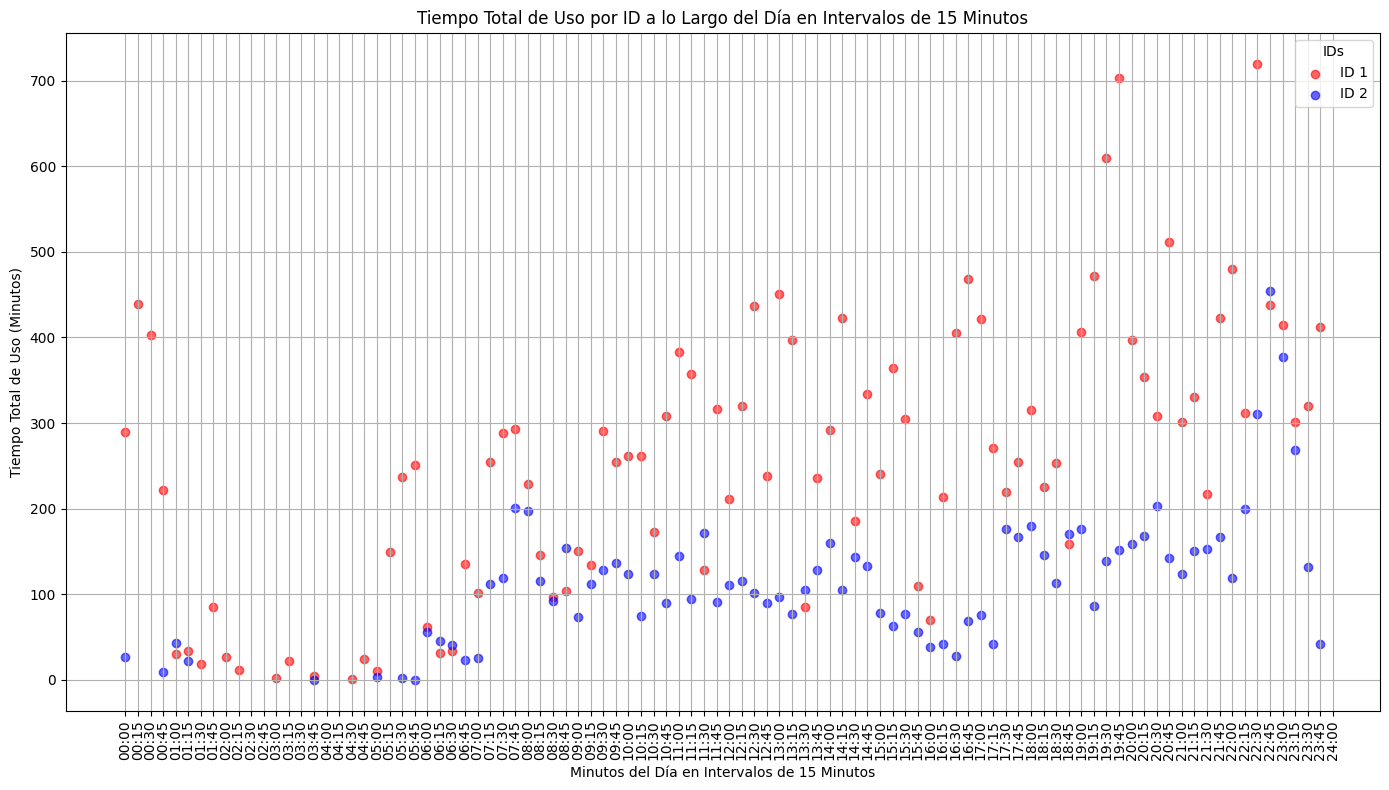

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
df_final = pd.read_csv('combined_27_30_FV2.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos los minutos del día
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Redondeamos los minutos del día al intervalo de 15 minutos más cercano
df_final['Minutos_Dia_15'] = df_final['Minutos_Dia'] // 15 * 15

# Agrupamos por 'Minutos_Dia_15' y 'ID' para obtener el tiempo total de uso por ID en esos intervalos de tiempo
uso_por_minutos_dia = df_final.groupby(['Minutos_Dia_15', 'ID']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Asignamos los colores según el ID
uso_por_minutos_dia['Color'] = uso_por_minutos_dia['ID'].map({1: 'red', 2: 'blue'})

# Creación del scatter plot
plt.figure(figsize=(14, 8))
for color in ['red', 'blue']:
    subset = uso_por_minutos_dia[uso_por_minutos_dia['Color'] == color]
    plt.scatter(subset['Minutos_Dia_15'], subset['Duracion_Minutos'], alpha=0.6, color=color, label=f'ID {subset["ID"].iloc[0]}')

# Ajustar las marcas del eje X para mostrar intervalos de 15 minutos en formato HH:MM
xticks = range(0, 1440 + 1, 15)
xtick_labels = [f'{int(x / 60):02d}:{int(x % 60):02d}' for x in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)

# Añadir la leyenda fuera del plot
plt.legend(title='IDs')

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día en Intervalos de 15 Minutos')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso por ID a lo Largo del Día en Intervalos de 15 Minutos')
plt.grid(True)

# Ajuste del layout para incluir la leyenda
plt.tight_layout()

# Mostrar gráfico
plt.show()


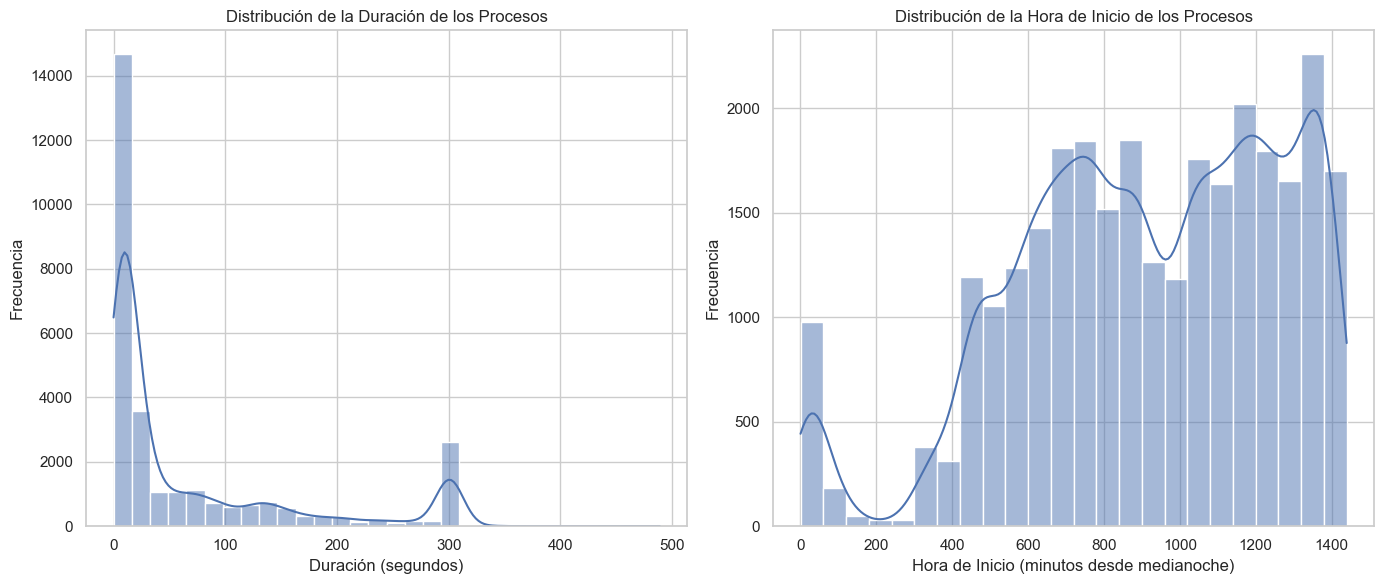

In [47]:
from datetime import datetime, timedelta
import pandas as pd
file_path = 'combined_27_30_FV2.csv'  # Asegúrate de ajustar la ruta del archivo según sea necesario
data = pd.read_csv(file_path)
# Definiendo una función para calcular la duración en segundos
def calcular_duracion(fecha_inicio, hora_inicio, fecha_final, hora_final):
    formato = "%Y-%m-%d %H:%M:%S"
    inicio = datetime.strptime(f"{fecha_inicio} {hora_inicio}", formato)
    final = datetime.strptime(f"{fecha_final} {hora_final}", formato)
    duracion = (final - inicio).total_seconds()
    return duracion

# Aplicando la función para calcular la duración de cada proceso
data['Duracion_Segundos'] = data.apply(lambda row: calcular_duracion(row['Fecha_Inicio'], row['Hora_Inicio'],
                                                                     row['Fecha_Final'], row['Hora_Final']), axis=1)

# Convirtiendo la hora de inicio a un formato numérico (minutos desde medianoche)
data['Hora_Inicio_Minutos'] = data['Hora_Inicio'].apply(lambda x: (datetime.strptime(x, "%H:%M:%S") - 
                                                                   datetime.strptime("00:00:00", "%H:%M:%S")).seconds / 60)

# Ahora tenemos dos nuevas columnas: 'Duracion_Segundos' y 'Hora_Inicio_Minutos'
# Estas serán nuestras dimensiones para aplicar clustering. Vamos a visualizar estas dimensiones para comprender mejor los datos.

import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set(style="whitegrid")

# Creando una figura con dos subplots (gráficos)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la distribución de la duración de los procesos
sns.histplot(data=data, x='Duracion_Segundos', bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de la Duración de los Procesos')
ax[0].set_xlabel('Duración (segundos)')
ax[0].set_ylabel('Frecuencia')

# Gráfico de la distribución de la hora de inicio de los procesos
sns.histplot(data=data, x='Hora_Inicio_Minutos', bins=24, kde=True, ax=ax[1])
ax[1].set_title('Distribución de la Hora de Inicio de los Procesos')
ax[1].set_xlabel('Hora de Inicio (minutos desde medianoche)')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


C:\Users\Camilo\AppData\Local\Temp\ipykernel_11524\2079917434.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = get_cmap('tab20', num_unique_ids)


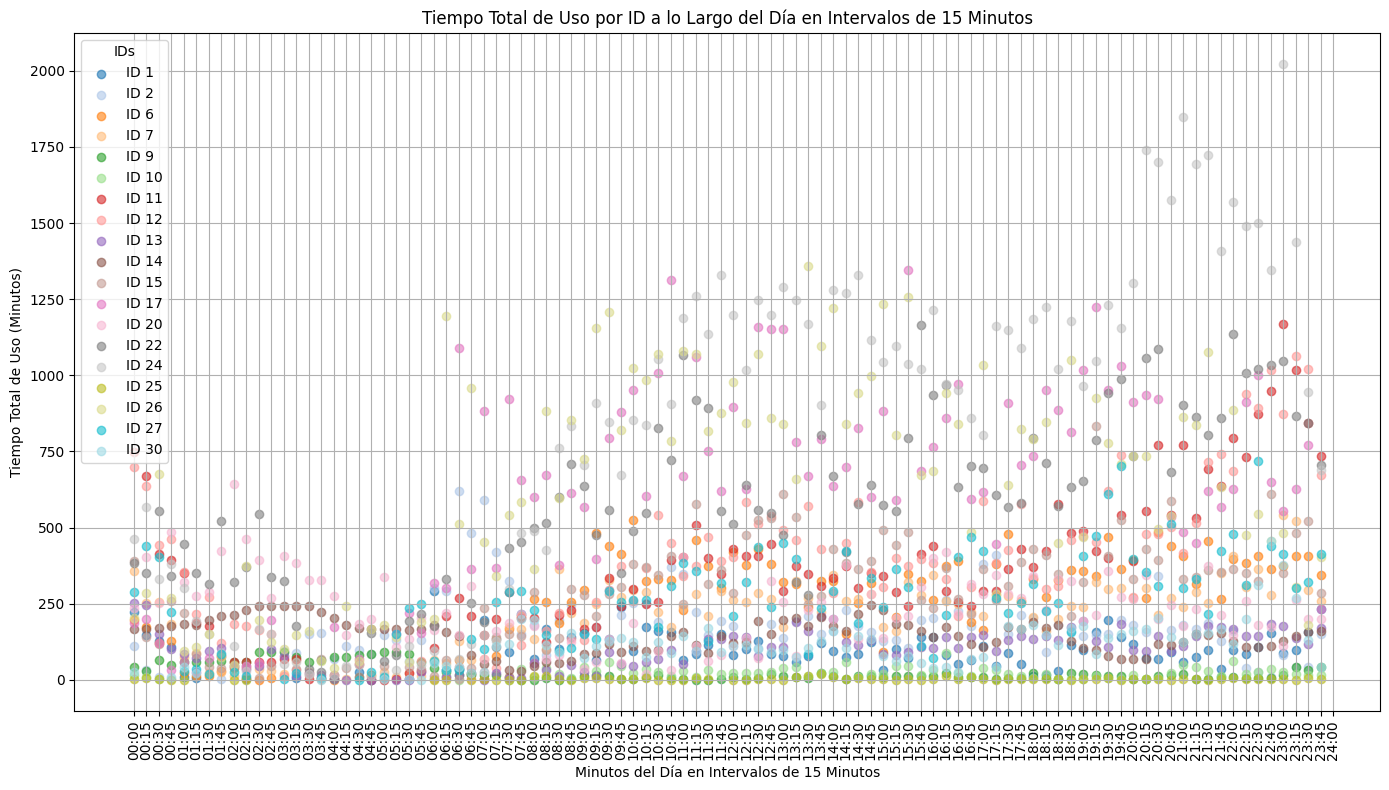

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.cm import get_cmap

# Cargamos los datos
df_final = pd.read_csv('combined_dataSIN5.csv')

# Convertimos las fechas y horas a datetime y calculamos la duración en minutos
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Final_Completo'] = pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final'])
df_final['Duracion_Minutos'] = (df_final['Final_Completo'] - df_final['Inicio_Completo']).dt.total_seconds() / 60

# Calculamos los minutos del día
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Redondeamos los minutos del día al intervalo de 15 minutos más cercano
df_final['Minutos_Dia_15'] = df_final['Minutos_Dia'] // 15 * 15

# Agrupamos por 'Minutos_Dia_15' y 'ID' para obtener el tiempo total de uso por ID en esos intervalos de tiempo
uso_por_minutos_dia = df_final.groupby(['Minutos_Dia_15', 'ID']).agg({'Duracion_Minutos':'sum'}).reset_index()

# Codificamos los IDs para la visualización por color
label_encoder = LabelEncoder()
uso_por_minutos_dia['Color_Label'] = label_encoder.fit_transform(uso_por_minutos_dia['ID'])

# Creamos un mapa de colores basado en la cantidad de IDs únicos
num_unique_ids = uso_por_minutos_dia['ID'].nunique()
color_map = get_cmap('tab20', num_unique_ids)

# Creación del scatter plot
plt.figure(figsize=(14, 8))
for id in uso_por_minutos_dia['ID'].unique():
    subset = uso_por_minutos_dia[uso_por_minutos_dia['ID'] == id]
    plt.scatter(subset['Minutos_Dia_15'], subset['Duracion_Minutos'], alpha=0.6, 
                color=color_map(label_encoder.transform([id])[0]), label=f'ID {id}')

# Ajustar las marcas del eje X para mostrar intervalos de 15 minutos en formato HH:MM
xticks = range(0, 1440 + 1, 15)
xtick_labels = [f'{int(x / 60):02d}:{int(x % 60):02d}' for x in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)

# Añadir la leyenda fuera del plot
plt.legend(title='IDs')

# Etiquetas y título del gráfico
plt.xlabel('Minutos del Día en Intervalos de 15 Minutos')
plt.ylabel('Tiempo Total de Uso (Minutos)')
plt.title('Tiempo Total de Uso por ID a lo Largo del Día en Intervalos de 15 Minutos')
plt.grid(True)

# Ajuste del layout para incluir la leyenda
plt.tight_layout()

# Mostrar gráfico
plt.show()


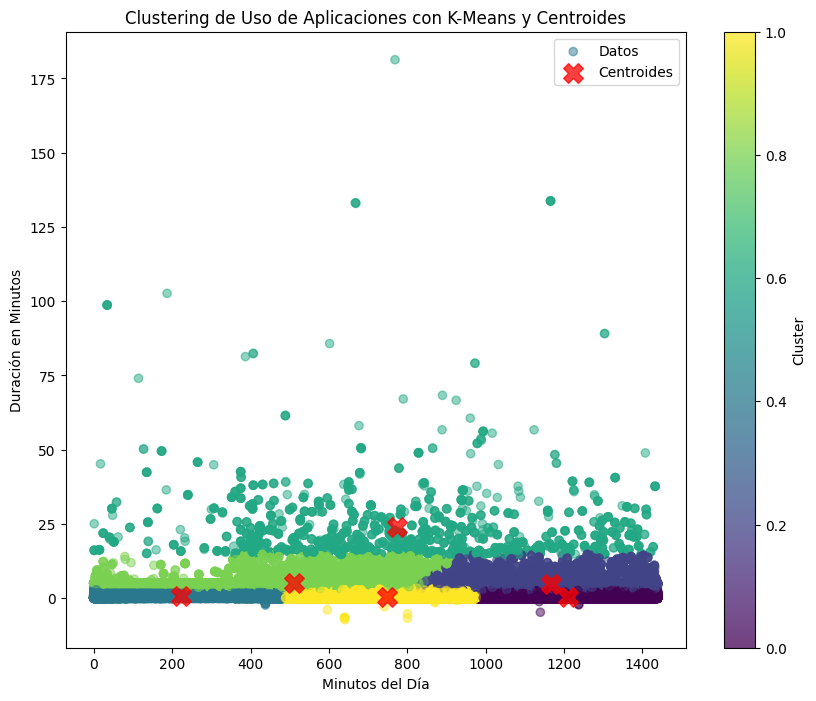

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargamos los datos
df_final = pd.read_csv('combined_dataSIN5.csv')

# Preprocesamiento
df_final['Inicio_Completo'] = pd.to_datetime(df_final['Fecha_Inicio'] + ' ' + df_final['Hora_Inicio'])
df_final['Duracion_Minutos'] = (pd.to_datetime(df_final['Fecha_Final'] + ' ' + df_final['Hora_Final']) - df_final['Inicio_Completo']).dt.total_seconds() / 60
df_final['Minutos_Dia'] = df_final['Inicio_Completo'].dt.hour * 60 + df_final['Inicio_Completo'].dt.minute

# Seleccionar características para el clustering
X = df_final[['Minutos_Dia', 'Duracion_Minutos']]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means    
kmeans = KMeans(n_clusters=6)
df_final['Cluster'] = kmeans.fit_predict(X_scaled)

# Obtener los centroides (notar que están en el espacio escalado)
centroids = kmeans.cluster_centers_

# Convertir los centroides al espacio original
centroids_original = scaler.inverse_transform(centroids)

# Visualización de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_final['Minutos_Dia'], df_final['Duracion_Minutos'], c=df_final['Cluster'], cmap='viridis', alpha=0.5, label='Datos')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel('Minutos del Día')
plt.ylabel('Duración en Minutos')
plt.title('Clustering de Uso de Aplicaciones con K-Means y Centroides')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


Para n_clusters = 6, el puntaje de silueta promedio es : 0.44695770996843065


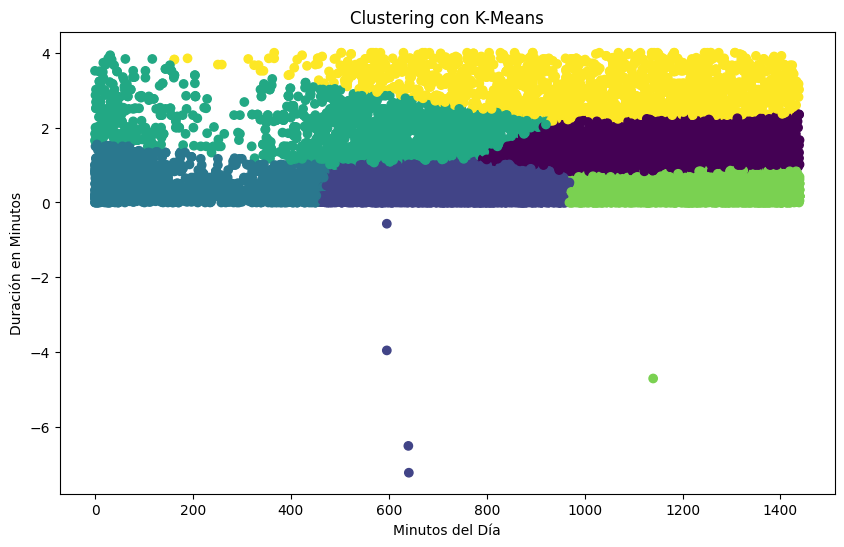

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Cargamos los datos
df_final = pd.read_csv('combined_dataSIN5.csv')  # Asegúrate de tener la ruta correcta

# Realizamos un muestreo del DataFrame para reducir su tamaño y facilitar los cálculos
# Ajusta el valor de frac según la capacidad de tu máquina; por ejemplo, 0.1 para el 10% de los datos
df_sampled = df_final.sample(frac=0.1)

# Preprocesamiento en el conjunto muestreado
df_sampled['Inicio_Completo'] = pd.to_datetime(df_sampled['Fecha_Inicio'] + ' ' + df_sampled['Hora_Inicio'])
df_sampled['Duracion_Minutos'] = (pd.to_datetime(df_sampled['Fecha_Final'] + ' ' + df_sampled['Hora_Final']) - df_sampled['Inicio_Completo']).dt.total_seconds() / 60
df_sampled['Minutos_Dia'] = df_sampled['Inicio_Completo'].dt.hour * 60 + df_sampled['Inicio_Completo'].dt.minute
df_sampled = df_sampled[df_sampled['Duracion_Minutos'] <= 4]
# Seleccionar características para el clustering
X = df_sampled[['Minutos_Dia', 'Duracion_Minutos']]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=6)
df_sampled['Cluster'] = kmeans.fit_predict(X_scaled)

# Calcular el puntaje de silueta
silhouette_avg = silhouette_score(X_scaled, df_sampled['Cluster'])
print(f"Para n_clusters = 6, el puntaje de silueta promedio es : {silhouette_avg}")

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_sampled['Minutos_Dia'], df_sampled['Duracion_Minutos'], c=df_sampled['Cluster'])

plt.title('Clustering con K-Means')
plt.xlabel('Minutos del Día')
plt.ylabel('Duración en Minutos')
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Cargamos los datos
df_final = pd.read_csv('combined_dataSIN5.csv')

# Tomamos una muestra aleatoria del 10% de los datos
df_sampled = df_final.sample(frac=0.1)

# Preprocesamiento en la muestra
df_sampled['Inicio_Completo'] = pd.to_datetime(df_sampled['Fecha_Inicio'] + ' ' + df_sampled['Hora_Inicio'])
df_sampled['Duracion_Minutos'] = (pd.to_datetime(df_sampled['Fecha_Final'] + ' ' + df_sampled['Hora_Final']) - df_sampled['Inicio_Completo']).dt.total_seconds() / 60
df_sampled['Minutos_Dia'] = df_sampled['Inicio_Completo'].dt.hour * 60 + df_sampled['Inicio_Completo'].dt.minute

# Filtramos los datos para eliminar aquellos cuya duración supera los 50 minutos
df_sampled_filtered = df_sampled[df_sampled['Duracion_Minutos'] <= 50]

# Seleccionar características para el clustering
X = df_sampled_filtered[['Minutos_Dia', 'Duracion_Minutos']]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rango de número de clusters a evaluar
range_n_clusters = list(range(2, 11))
n_clusters=6
# Número de repeticiones para cada configuración de número de clusters
n_repeats = 10

# Diccionario para almacenar los puntajes de silueta
silhouette_scores = {n: [] for n in range_n_clusters}


for _ in range(n_repeats):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=6)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[n_clusters].append(silhouette_avg)
    
    # Imprimir el promedio de los coeficientes de silueta para esta configuración de n_clusters
    print(f"Para n_clusters 6, el coeficiente de silueta promedio es: {np.mean(silhouette_scores[n_clusters])}")

# Opcional: Analizar o utilizar silhouette_scores para más análisis o visualizaciones.


Para n_clusters 6, el coeficiente de silueta promedio es: 0.4910017879660498
Para n_clusters 6, el coeficiente de silueta promedio es: 0.4912504009759733
Para n_clusters 6, el coeficiente de silueta promedio es: 0.49121125359618417
Para n_clusters 6, el coeficiente de silueta promedio es: 0.4922902314597995
Para n_clusters 6, el coeficiente de silueta promedio es: 0.4924478780754237
Para n_clusters 6, el coeficiente de silueta promedio es: 0.49253507857885054
Para n_clusters 6, el coeficiente de silueta promedio es: 0.49265612918539176
Para n_clusters 6, el coeficiente de silueta promedio es: 0.4924639073978039
Para n_clusters 6, el coeficiente de silueta promedio es: 0.49231602422433746
Para n_clusters 6, el coeficiente de silueta promedio es: 0.4921977176855643


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
data = pd.read_csv('combined_dataSIN5.csv')

# Convert date and time columns into datetime
data['Inicio'] = pd.to_datetime(data['Fecha_Inicio'] + ' ' + data['Hora_Inicio'])
data['Final'] = pd.to_datetime(data['Fecha_Final'] + ' ' + data['Hora_Final'])

# Calculate duration in minutes
data['Duracion'] = (data['Final'] - data['Inicio']).dt.total_seconds() / 60

# Use the 'ID' as the second dimension for clustering
# Since 'ID' is a categorical variable with 20 unique values, we can encode this directly as a feature.

# Define the number of clusters
num_clusters = 5

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans algorithm to the duration and ID data
data['Cluster'] = kmeans.fit_predict(data[['Duracion', 'ID']])

# Calculate silhouette score
silhouette_avg = silhouette_score(data[['Duracion', 'ID']], data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters along with their centroids
plt.figure(figsize=(10, 6))
plt.scatter(data['Duracion'], data['ID'], c=data['Cluster'], cmap='viridis', marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('KMeans Clustering of Processes')
plt.xlabel('Duration (minutes)')
plt.ylabel('ID')
plt.show()


KeyboardInterrupt: 